# Genre recognition: experiment

Goal: observe the effect of convergence on a small dataset (500 songs, 149 frames, $m=128$) with $\lambda_g=100$.

Conclusion: Relative stopping criterion works well on the outer loop. The stopping criterion `rtol=1e-3` is too restrictive and reduces performance over several metrics.

Observations:
* Relative stopping criterion works well on the outer loop. Remove the need to set `N_outer`.
* Objective and sparsity diminishes linearly with rtol.
* The gap between the objective functions reduces to one order of magnitude.
* Some iterations are needed to let some $Z$ coefficients grow while others vanish.
* Running time is exponential to `1/rtol`.
* `rtol=1e-5` is sufficient for `lg=100`.
* The minimum `rtol` may depend on `lg`. Larger `lg` needs smaller `rtol`.
* Ran for 2h.

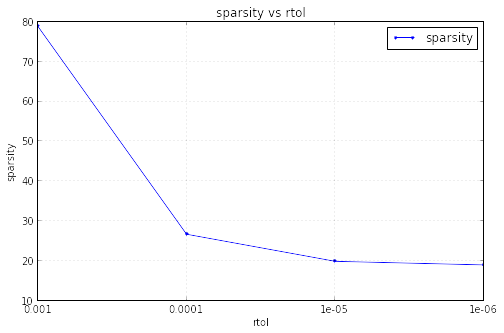

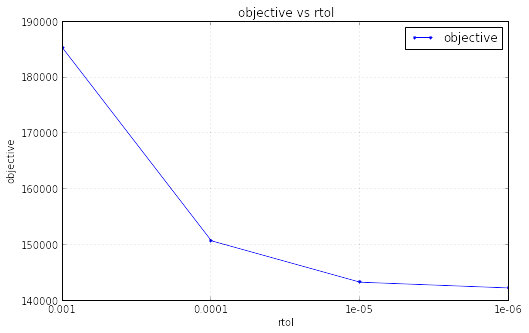

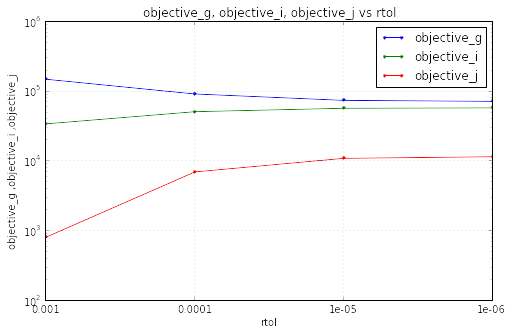

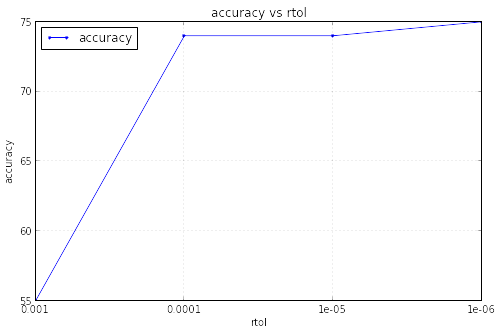

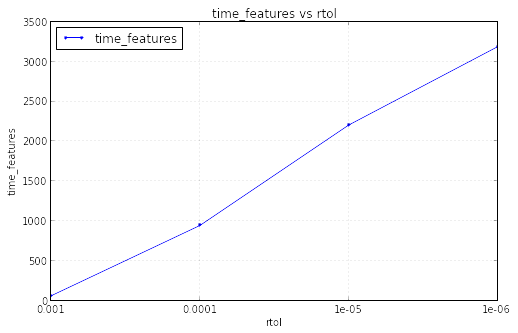

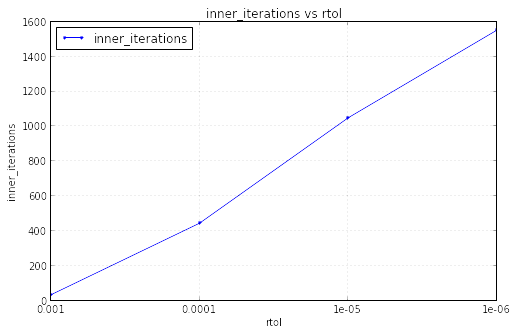

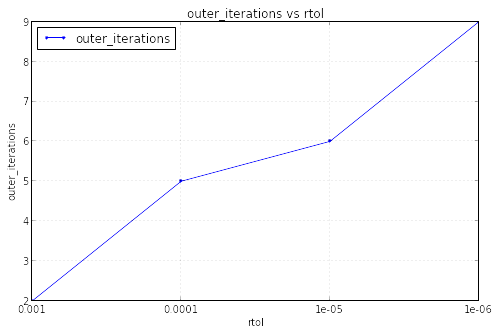

In [10]:
time_features = [63, 945, 2205, 3187]
objective = [1.853179e+05, 1.507532e+05, 1.433319e+05, 1.423020e+05]
inner_iterations = [34, 445, 1050, 1553]
outer_iterations = [2, 5, 6, 9]
sparsity = [78.9, 26.7, 19.9, 19.0]
objective_g = [1.500593e+05, 9.228578e+04, 7.472236e+04, 7.236831e+04]
objective_i = [3.444047e+04, 5.142558e+04, 5.758356e+04, 5.831160e+04]
objective_j = [8.181773e+02, 7.041881e+03, 1.102598e+04, 1.162210e+04]
accuracy = [55, 74, 74, 75]

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    for var in args:
        pltfunc(x, globals()[var], '.-', label=var)
    plt.xlim(0, len(Pvalues)-1)
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

plot('sparsity')
plot('objective')
plot('objective_g', 'objective_i', 'objective_j', log=True)
plot('accuracy')
plot('time_features')
plot('inner_iterations')
plot('outer_iterations')

## Hyper-parameters

### Parameter under test

In [7]:
Pname = 'rtol'
Pvalues = [1e-3, 1e-4, 1e-5, 1e-6]

# Regenerate the graph or the features at each iteration.
regen_graph = False
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5

### Numerical parameters

In [3]:
# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-3  # 1e-3, 1e-5, 1e-7
p['N_outer'] = 40  # 10, 15, 20

# Classification.
p['Ncv'] = 10

## Processing

Data: (149000, 96), float32
Elapsed time: 168.88 seconds
All self-referenced in the first column: True
dist in [0.0, 0.4668174088]
w in [0.0424621365964, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2382050,), float32
  L_indices : (2382050,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2382050,), float32
  W_indices : (2382050,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 177.82 seconds

--------------------------------------------------

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x n=96 -> 123,648,000 floats
  dim: 123,648 features per clip
  shape: (10, 100, 64

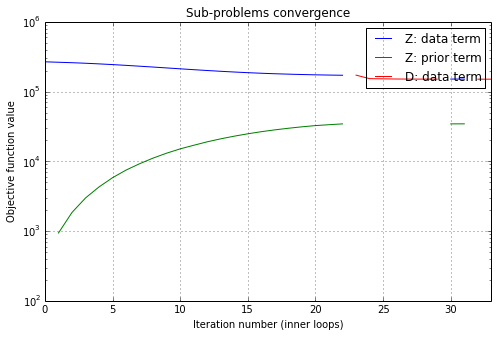

Inner loop: 34 iterations
g(Z) = ||X-DZ||_2^2 = 1.500593e+05
rdiff: 0.00275958672319
i(Z) = ||Z||_1 = 3.444047e+04
j(Z) = tr(Z^TLZ) = 8.181773e+02


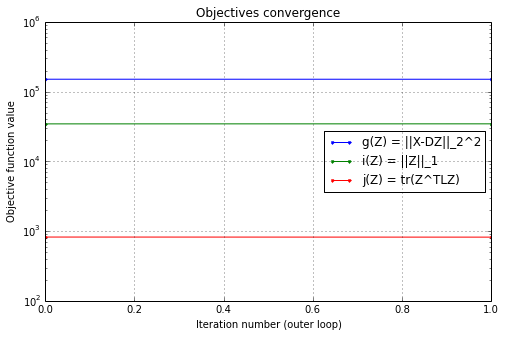

Global objective: 1.853179e+05


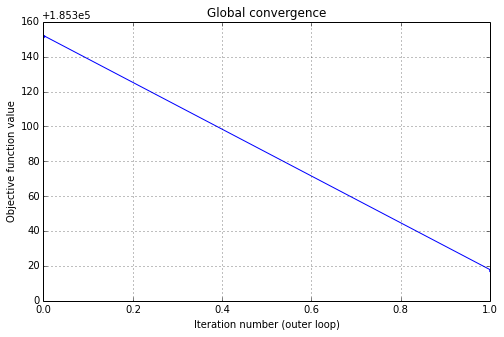

Outer loop: 2 iterations

Z in [-0.000339607271599, 0.0188992358744]
Sparsity of Z: 15,056,401 non-zero entries out of 19,072,000 entries, i.e. 78.9%.


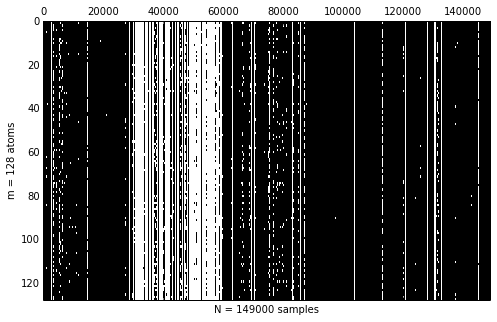

D in [0.0152181042358, 0.265898674726]
d in [0.999999701977, 1.00000035763]
Constraints on D: True


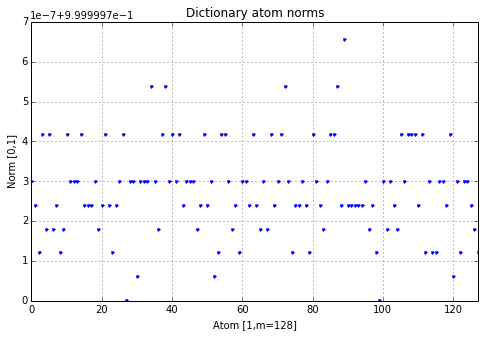

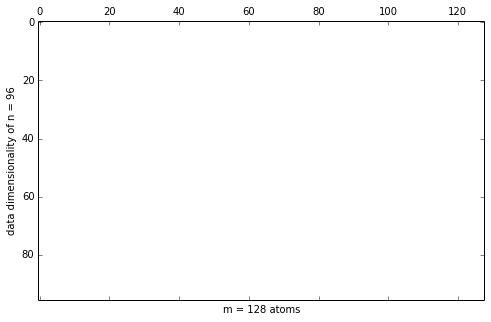

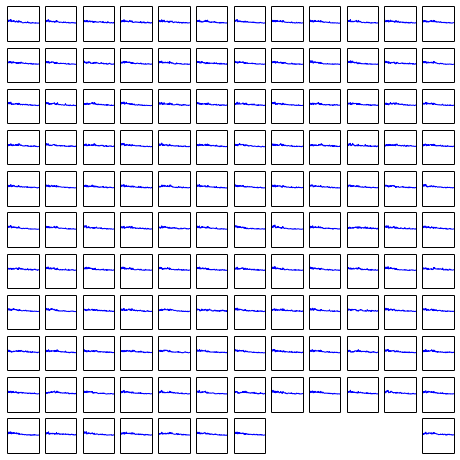

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 71 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 flo

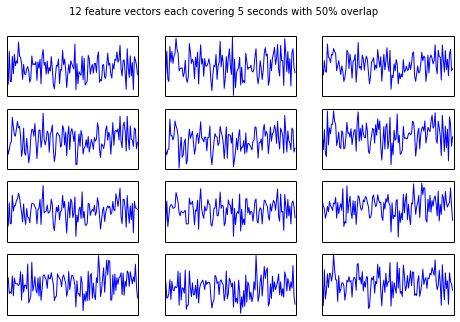

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 54.3 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 51.5 %
Clips accuracy: 55.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 53 (+/-  7.4) <- [ 0.68  0.54  0.5   0.42  0.52  0.64  0.5   0.56  0.46  0.52]
 54 (+/-  4.2) <- [ 0.5   0.54  0.6   0.52  0.62  0.48  0.58  0.54  0.52  0.54]
 55 (+/-  6.4) <- [ 0.56  0.52  0.66  0.56  0.44  0.62  0.52  0.48  0.62  0.54]
 54 (+/-  4.5) <- [ 0.46  0.5   0.6   0.54  0.58  0.54  0.58  0.48  0.54  0.58]
 54 (+/-  6.8) <- [ 0.42  0.58  0.5   0.54  0.48  0.56  0.6   0.52  0.68  0.5 ]
 53 (+/-  9.7) <- [ 0.44  0.58  0.6   0.54  0.52  0.38  0.4

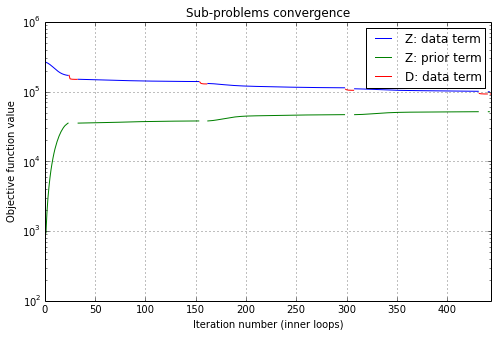

Inner loop: 445 iterations
g(Z) = ||X-DZ||_2^2 = 9.228578e+04
rdiff: 0.000422113543358
i(Z) = ||Z||_1 = 5.142558e+04
j(Z) = tr(Z^TLZ) = 7.041881e+03


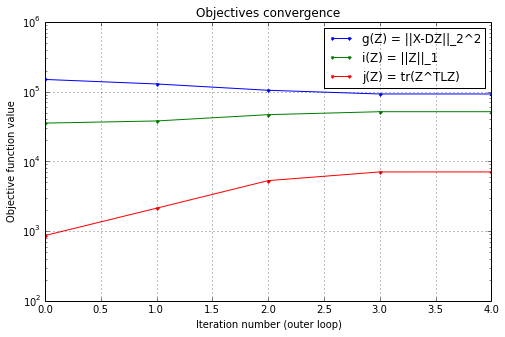

Global objective: 1.507532e+05


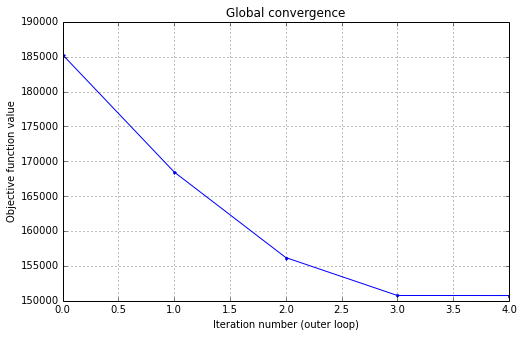

Outer loop: 5 iterations

Z in [-0.0664682462811, 0.329408019781]
Sparsity of Z: 5,084,783 non-zero entries out of 19,072,000 entries, i.e. 26.7%.


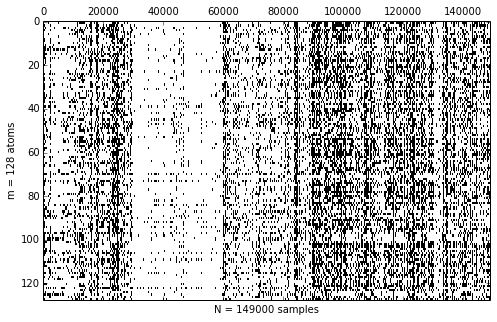

D in [-0.0326981656253, 0.793117344379]
d in [0.999999701977, 1.00000023842]
Constraints on D: True


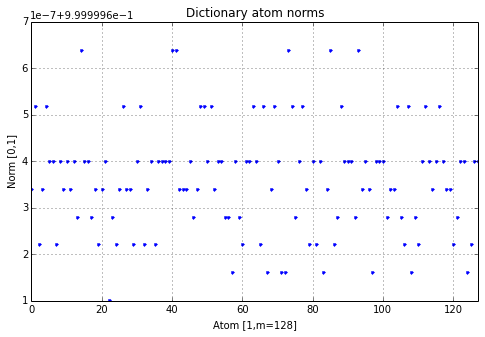

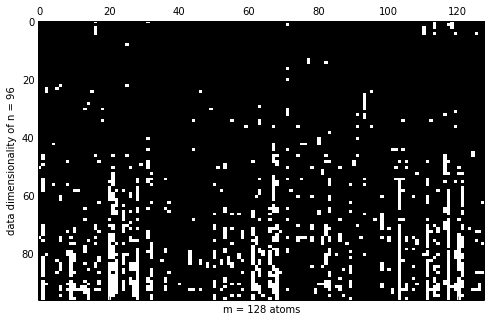

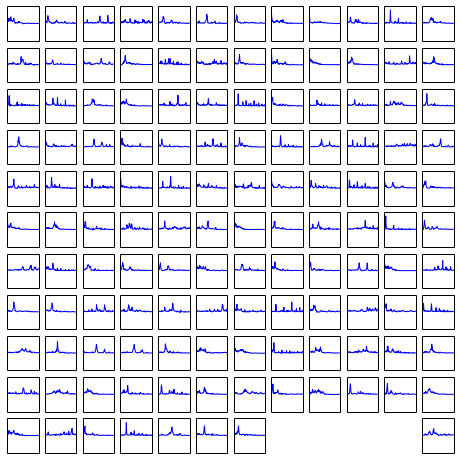

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 953 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 fl

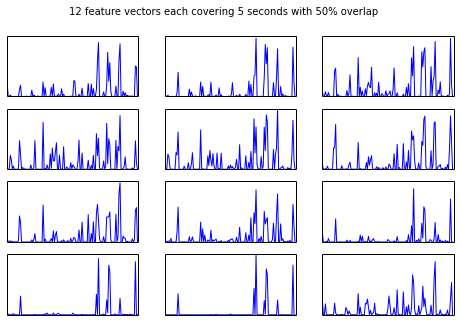

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 74.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.2 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 72 (+/-  6.1) <- [ 0.7   0.82  0.74  0.7   0.7   0.82  0.62  0.66  0.76  0.72]
 72 (+/-  3.1) <- [ 0.68  0.68  0.72  0.7   0.76  0.78  0.72  0.74  0.7   0.72]
 72 (+/-  4.0) <- [ 0.74  0.76  0.8   0.66  0.68  0.72  0.68  0.72  0.74  0.74]
 73 (+/-  3.9) <- [ 0.66  0.78  0.72  0.76  0.66  0.72  0.76  0.74  0.74  0.76]
 74 (+/-  4.7) <- [ 0.72  0.82  0.72  0.82  0.7   0.74  0.72  0.66  0.76  0.74]
 72 (+/-  4.0) <- [ 0.7   0.8   0.74  0.72  0.76  0.66  0.7

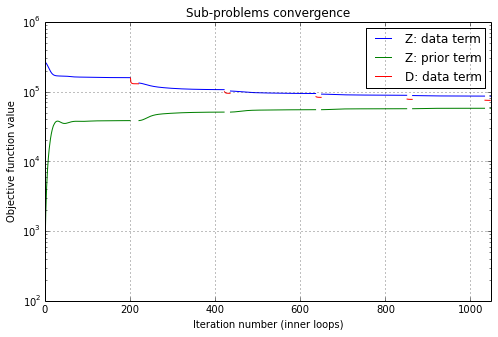

Inner loop: 1050 iterations
g(Z) = ||X-DZ||_2^2 = 7.472236e+04
rdiff: 0.00096927826376
i(Z) = ||Z||_1 = 5.758356e+04
j(Z) = tr(Z^TLZ) = 1.102598e+04


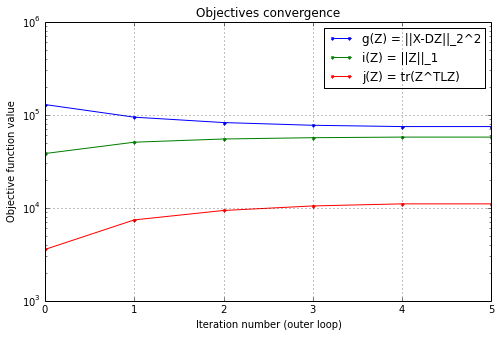

Global objective: 1.433319e+05


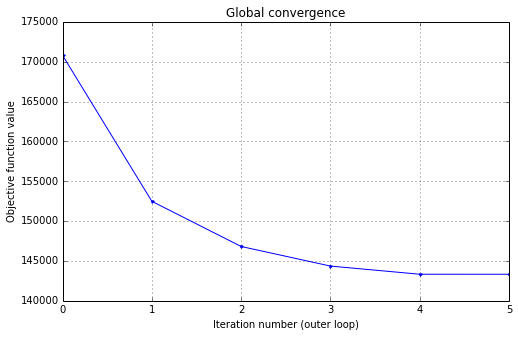

Outer loop: 6 iterations

Z in [-0.0726857036352, 0.861188650131]
Sparsity of Z: 3,787,381 non-zero entries out of 19,072,000 entries, i.e. 19.9%.


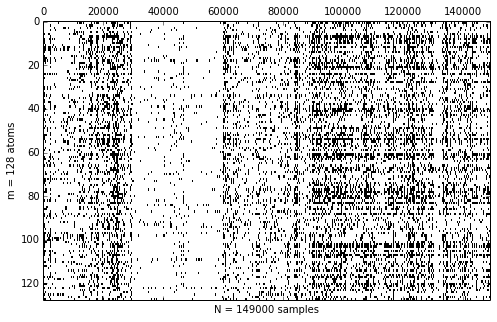

D in [-0.0527373924851, 0.91136944294]
d in [0.999999642372, 1.00000047684]
Constraints on D: True


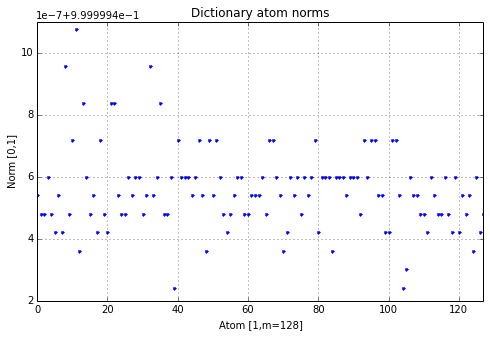

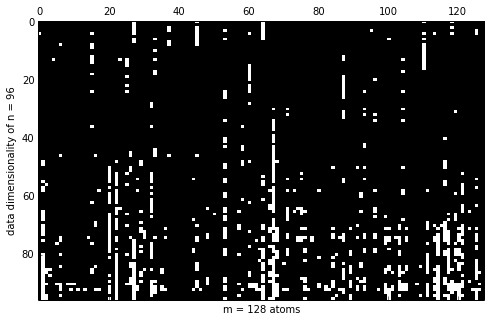

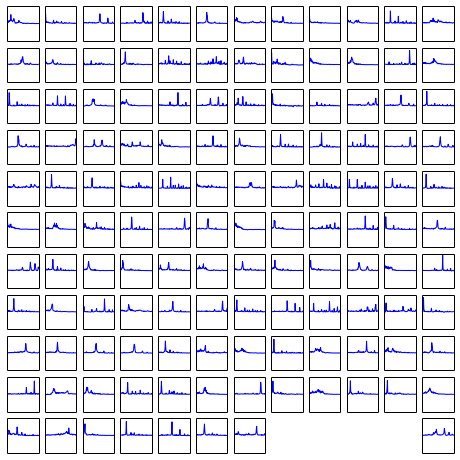

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2213 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

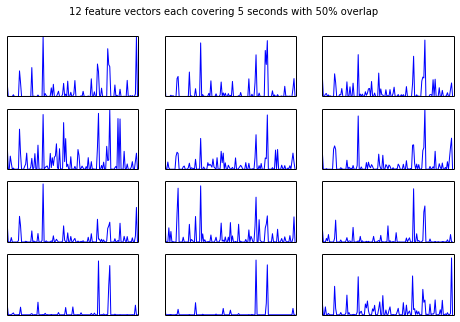

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 63.5 %
Clips accuracy: 70.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 72 (+/-  7.8) <- [ 0.7   0.76  0.68  0.68  0.8   0.86  0.64  0.58  0.76  0.76]
 73 (+/-  3.9) <- [ 0.74  0.7   0.76  0.64  0.78  0.74  0.74  0.78  0.72  0.72]
 73 (+/-  6.8) <- [ 0.72  0.84  0.8   0.62  0.66  0.72  0.68  0.82  0.72  0.76]
 70 (+/-  5.5) <- [ 0.68  0.74  0.68  0.66  0.64  0.74  0.78  0.64  0.8   0.66]
 72 (+/-  4.1) <- [ 0.68  0.74  0.66  0.78  0.7   0.76  0.74  0.66  0.76  0.72]
 74 (+/-  4.6) <- [ 0.72  0.78  0.8   0.78  0.78  0.68  0.7

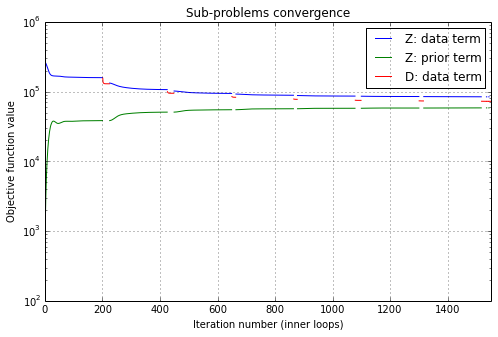

Inner loop: 1553 iterations
g(Z) = ||X-DZ||_2^2 = 7.236831e+04
rdiff: 0.00118669215297
i(Z) = ||Z||_1 = 5.831160e+04
j(Z) = tr(Z^TLZ) = 1.162210e+04


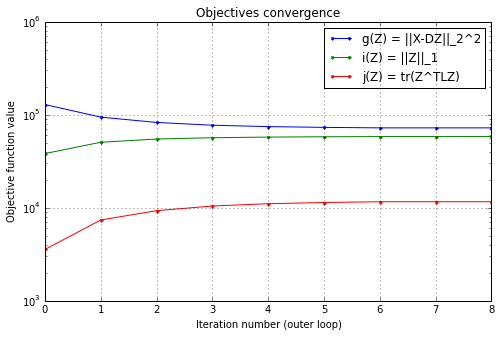

Global objective: 1.423020e+05


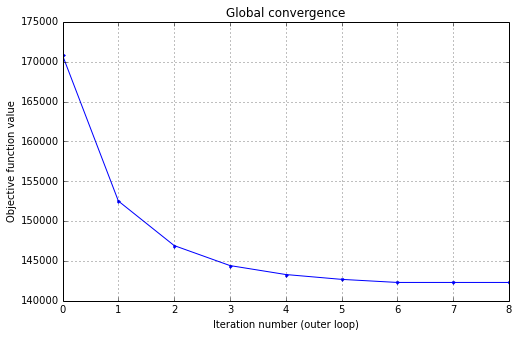

Outer loop: 9 iterations

Z in [-0.0792907774448, 0.93476241827]
Sparsity of Z: 3,615,523 non-zero entries out of 19,072,000 entries, i.e. 19.0%.


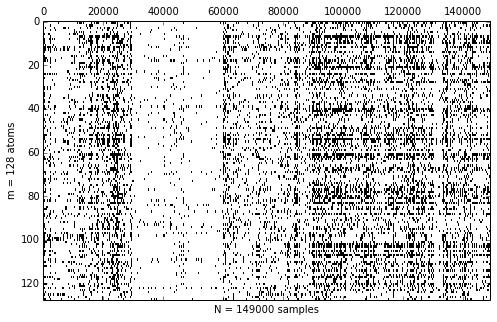

D in [-0.0317405797541, 0.916627943516]
d in [0.999999642372, 1.00000047684]
Constraints on D: True


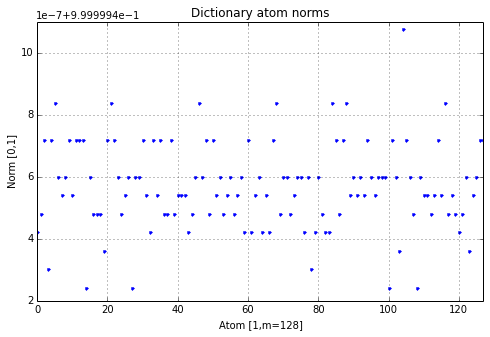

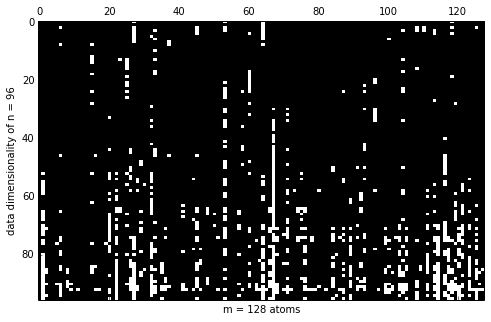

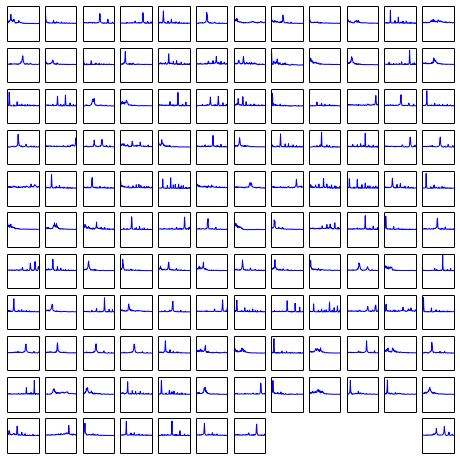

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 3195 seconds

--------------------------------------------------

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x n=128 -> 19,072,000 f

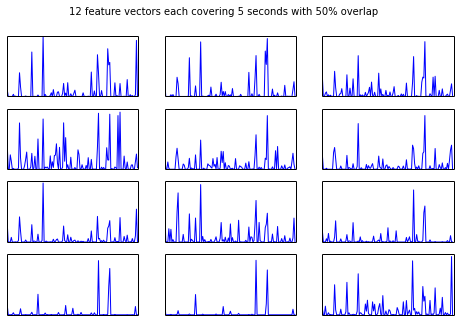

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.0 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.6 %
Clips accuracy: 72.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
 73 (+/-  6.5) <- [ 0.8   0.74  0.7   0.76  0.76  0.8   0.6   0.62  0.76  0.74]
 73 (+/-  4.5) <- [ 0.7   0.72  0.8   0.68  0.78  0.8   0.7   0.74  0.68  0.7 ]
 73 (+/-  5.2) <- [ 0.78  0.82  0.78  0.66  0.74  0.66  0.68  0.76  0.72  0.72]
 72 (+/-  4.7) <- [ 0.64  0.8   0.74  0.72  0.7   0.72  0.72  0.68  0.8   0.7 ]
 75 (+/-  4.8) <- [ 0.74  0.76  0.7   0.8   0.7   0.76  0.82  0.66  0.78  0.78]
 73 (+/-  4.0) <- [ 0.7   0.82  0.74  0.76  0.76  0.72  0.7

In [4]:
import numpy as np
import time

texperiment = time.time()

def separator():
    print('\n' + 50 * '-' + '\n')
    # Fair comparison when tuning parameters.
    np.random.seed(1)

#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    %run audio_graph.ipynb
    separator()
if not regen_features:
    %run audio_features.ipynb
    separator()

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        %run audio_graph.ipynb
        separator()
    if regen_features:
        %run audio_features.ipynb
        separator()
    %run audio_classification.ipynb
    separator()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))